<a href="https://colab.research.google.com/github/j-chu33/MarketPlace/blob/main/DATA_301_Lab_1A_Jonathan_Chu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**1. I believe that the percentage of the values that will have a first digit of 1 or 9 will be equal at approximately 0.11, or 1/9. In theory, if the numbers are truly random and from a random sample, the frequency of all the numbers should be equal. The frequency would be 1/9 becuase we won't have a 0 as the first number.**

**2. I believe that the percentage of the values that will have a last digit of 1 or 9 will be equal at approximately 0.11, or 1/9. From the same logic as above, if the numbers are truly random and from a random sample, the frequency of all the numbers will be equal. The frequency would be 1/9 because we do not consider having 0 as the last number**

In [ ]:
import pandas as pd

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
df_sp500 = pd.read_csv("https://dlsun.github.io/pods/data/sp500.csv")
df_sp500.set_index(['Name'], inplace = True)
df_sp500.head()

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798


**The unit of observation is the measurement of company stocks on different days. I don't think there is a natural variable to use as an index, but the combination of the date and Name variables could serve as unique indexes.**

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

In [ ]:
df_sp500['volume'] = df_sp500['volume'].astype(str)
df_volume = df_sp500[['volume']]
volume_first = df_volume['volume'].str[0].value_counts(normalize = True)
volume_first

1    0.326733
2    0.184158
3    0.116832
4    0.085149
5    0.081188
6    0.071287
7    0.049505
8    0.043564
9    0.041584
Name: volume, dtype: float64

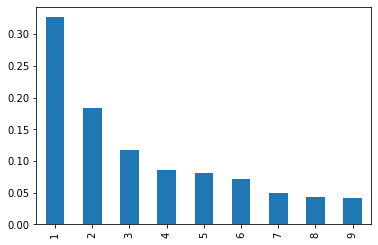

In [ ]:
volume_first.plot.bar()

**It turns out that the frequency of the first numbers descends from 1 to 9, with 1 being the most frequent and 9 being the least. This is not what I predicted. I thought that all frequencies would be around 0.11, but in reality only two of the numbers had that frequency.**

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

In [ ]:
volume_last = df_volume.loc[df_volume['volume'].str[-1] != '0']
volume_last = volume_last['volume'].str[-1].value_counts(normalize = True)
volume_last

8    0.123620
2    0.123620
9    0.116998
1    0.116998
7    0.114790
6    0.112583
3    0.105960
5    0.097130
4    0.088300
Name: volume, dtype: float64

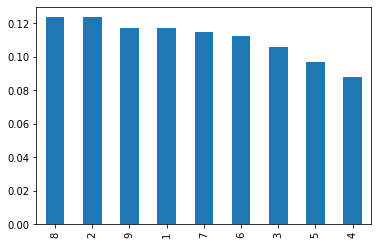

In [ ]:
volume_last.plot.bar()

**The frequencies of the last digits are much more like I predicted in question 0. Almost all the frequencies are about 0.1, or 1/10. There is no pattern like the first digits where the frequencies descended with numbers. Rather this distribution looks much more random**

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

In [ ]:
df_close = df_sp500[['close']]
close_first = df_close['close'].astype(str).str[1].value_counts(normalize = True)
close_first

1    0.338614
2    0.108911
3    0.102970
6    0.095050
4    0.085149
7    0.085149
5    0.077228
8    0.055446
9    0.051485
Name: close, dtype: float64

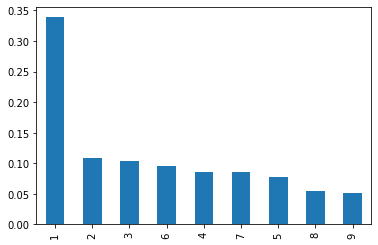

In [ ]:
close_first.plot.bar()

**After looking at the closing price variable, it does not seem like the first digit distribution is a fluke, rather the visualization supports the results from question 2. The frequency of the first digit descends no longer descends from 1-9 in order, however it does follow a similar pattern. 1 is still the most frequent and 9 is the least.**